## Esempio di Clusterizzazione con K-means

Import librerie necessarie.

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
X, y = make_blobs(n_samples=500, centers=4, n_features=2, cluster_std = 1.5, random_state=40)

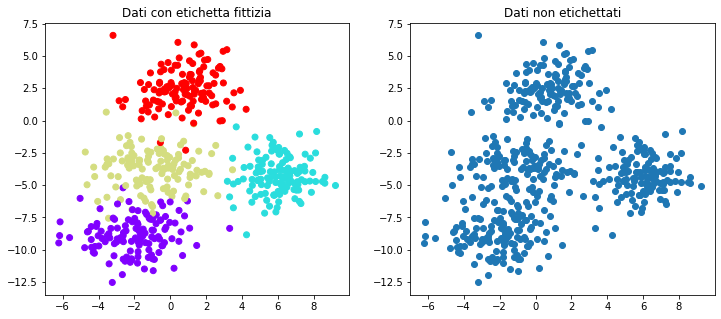

In [3]:
fig = plt.figure(figsize = [12, 5])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')
ax2.scatter(X[:, 0], X[:, 1], cmap='rainbow')
ax1.set_title('Dati con etichetta fittizia')
ax2.set_title('Dati non etichettati')
plt.show()

Addestriamo il modello

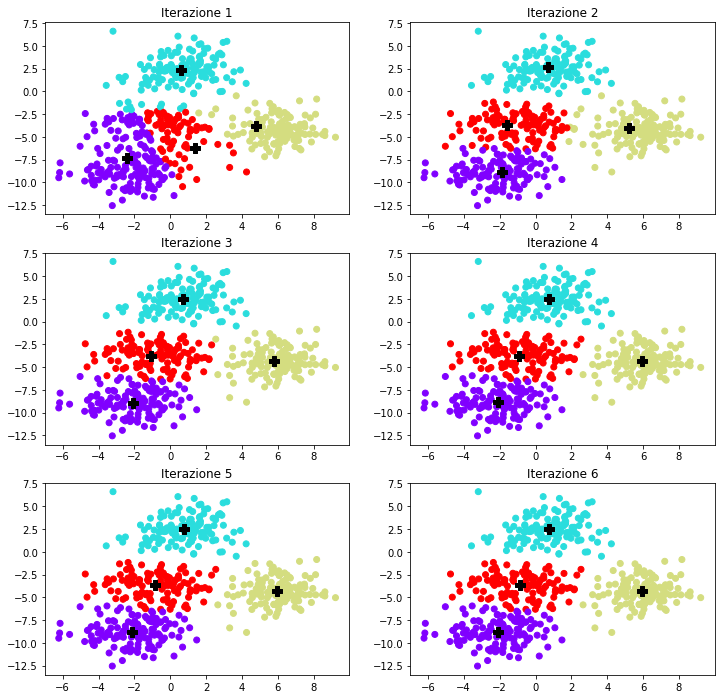

In [4]:
fig, ax = plt.subplots(nrows=3, ncols=2,figsize=(12,12))

c=d=0
for i in range(6):
    ax[c,d].title.set_text(f"Iterazione {i+1}")
    kmeans = KMeans(init="random", n_clusters=4, n_init=10, max_iter=i+1, random_state=30)
    kmeans.fit(X)
    centroids=kmeans.cluster_centers_
    ax[c,d].scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='rainbow')
    ax[c,d].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', marker = 'P')
    d+=1
    if d==2:
        c+=1
        d=0
        

Metodo per trovare il numero ottimale di cluster (valore di K) calcolando la somma delle distanze al quadrato di ogni punto dal centroide più vicino per diversi valori di K

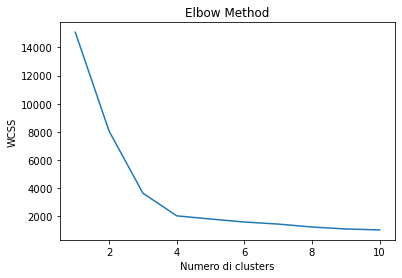

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(init="random", n_clusters=i, n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Numero di clusters')
plt.ylabel('WCSS')
plt.show()